### Problem 1

Generate a set of points from an exponential distribution with some parameter $\lambda$. Derive the Maximum Likelihood estimator for the exponentian distribution, estimate the parameter and compare to the known true parameter.

In [1]:
import numpy as np

In [7]:
l_true = 2

for n in [100, 1000, 10000, 100000]:
    np.random.seed(0)
    X = np.random.exponential(1/l_true, n)
    l_est = n / X.sum()
    print(n, l_est)

100 2.177111473090695
1000 1.992944560208343
10000 2.0187033123016858
100000 2.00064425892594


### Problem 2

Generate a second set of points from an exponential distribution with the parameter $\lambda_{true}+\delta$. Derive the Maximum Aposteriori estimate for the parameter of the distribution in Problem 1 assuming that the prior is normally distributed with $\mu = \lambda_{true}$ and $\sigma = \frac{\delta}{2}$. Calculate posterior probability of the second set of points.

$$\lambda_{MAP} = \frac{1}{2}\left(\mu - \sigma^2\sum_{i=1}^{n} x_i + \sqrt{(\mu - \sigma^2\sum_{i=1}^{n} x_i)^2 + 4n\sigma^2}\right)$$

In [9]:
import numpy as np

In [8]:
l_true = 2
delta = 1
n, m = 10000, 1000

In [11]:
mu, sigma = l_true, delta/2
X = np.random.exponential(1/l_true, n)
l_map = (mu - sigma**2*X.sum() + np.sqrt((mu - sigma**2*X.sum())**2+4*n*sigma**2))/2
print(l_map)

1.9768751054990616


### Problem 3

Select parameters for two non-collinear lines
$$y = a^{(i)}x + b^{(i)}$$
Generate 25 points on each line in the range $x \in [0; 10]$, add random gaussian noise with zero mean and std $\sigma = 0.5$ to each point. Plot to verify that task looks reasonable. Combine all generated points into one array and treat it as an input data.

Implement EM algorithm to estimate parameters of lines. Plot lines to visually verify goodness of fit (plotting lines and corresponding points in different color). Report average MSE for both lines.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [23]:
theta1, theta2 = [2, -4], [-0.5, 5]
x1, x2 = np.random.random(25)*10, np.random.random(25)*10
y1 = theta1[0]*x1+theta1[1]+np.random.normal(0, 0.5, x1.shape)
y2 = theta2[0]*x2+theta2[1]+np.random.normal(0, 0.5, x2.shape)

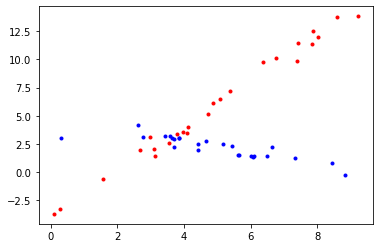

In [24]:
plt.plot(x1, y1, '.r', x2, y2, '.b')
plt.show()

In [30]:
X = np.zeros((50, 2))
X[:25,0] = x1
X[:25,1] = y1
X[25:,0] = x2
X[25:,1] = y2

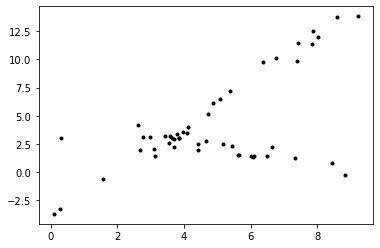

In [31]:
plt.plot(X[:,0], X[:,1], '.k')
plt.show()

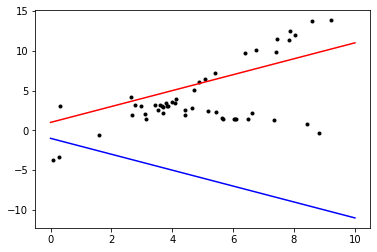

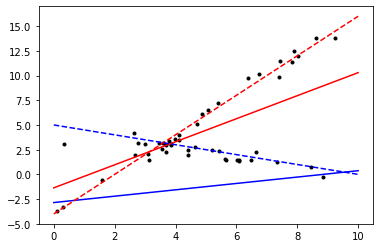

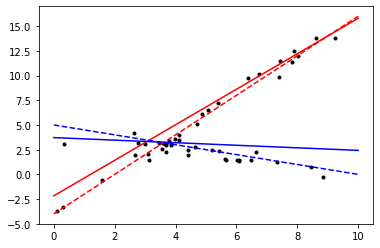

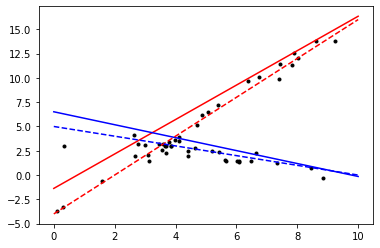

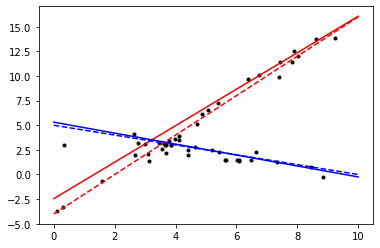

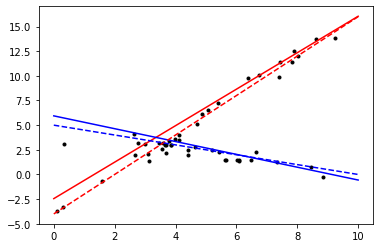

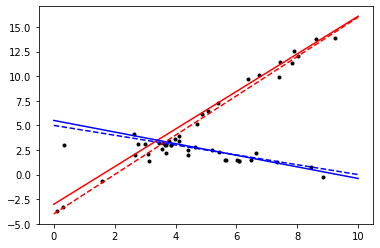

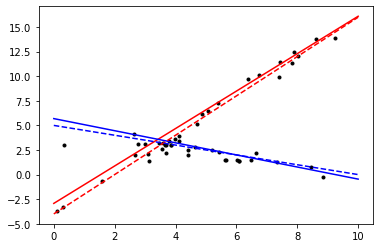

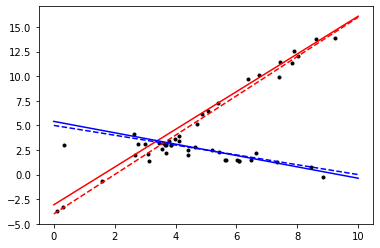

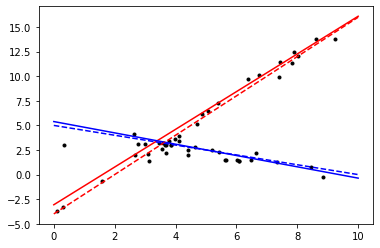

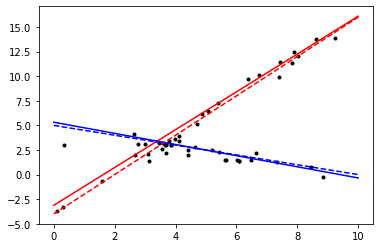

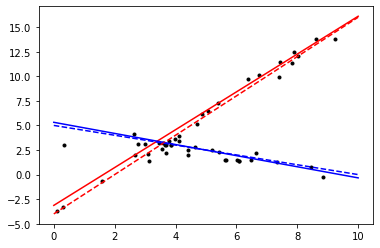

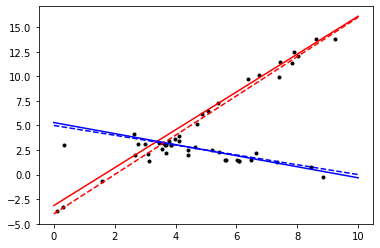

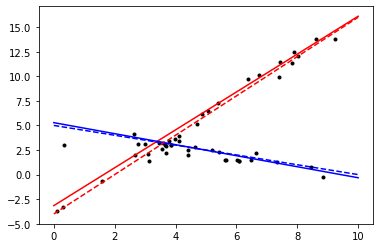

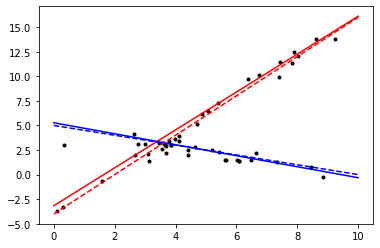

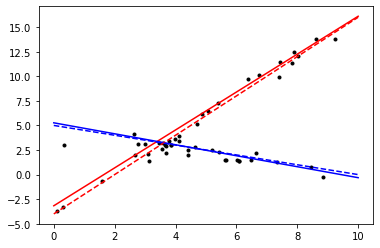

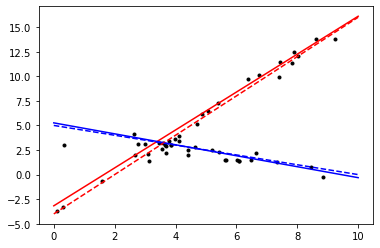

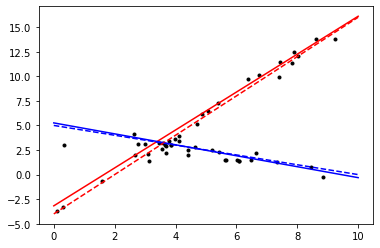

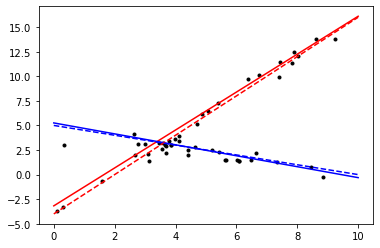

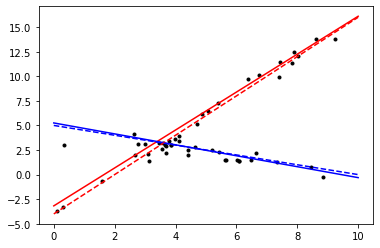

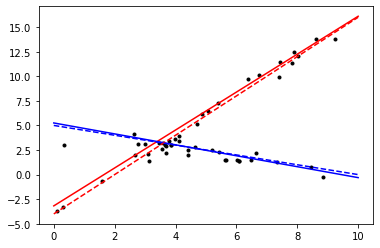

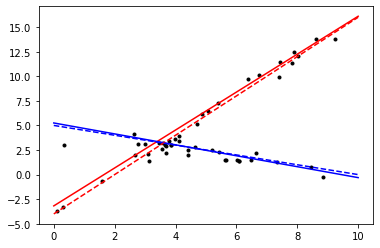

In [45]:
t1, t2 = [1,1], [-1,-1]
sigma1,sigma2 = 1, 1

x_plot = np.linspace(0,10,100)
plt.plot(X[:,0], X[:,1], '.k')
plt.plot(x_plot, t1[0]*x_plot+t1[1], 'r-', x_plot, t2[0]*x_plot+t2[1], 'b-')
plt.show()

for iter in range(100):
    t1_old, t2_old = t1.copy(), t2.copy()
    # E-step
    r1 = t1[0]*X[:,0] + t1[1] - X[:,1]
    r2 = t2[0]*X[:,0] + t2[1] - X[:,1]

    w1 = np.exp(-r1**2/sigma1)/(np.exp(-r1**2/sigma1)+np.exp(-r2**2/sigma2))
    w2 = np.exp(-r2**2/sigma2)/(np.exp(-r1**2/sigma1)+np.exp(-r2**2/sigma2))
    
    sigma1 = np.sum(r1**2*w1)/np.sum(w1)
    sigma2 = np.sum(r2**2*w2)/np.sum(w2)

    # M-step
    A = X.copy()
    A[:,1] = 1
    y = X[:,1]
    W1 = np.diag(w1)
    WA1 = W1@A
    t1 = la.pinv(WA1.T @ WA1) @ (WA1.T @ y)
    W2 = np.diag(w2)
    WA2 = W2@A
    t2 = la.pinv(WA2.T @ WA2) @ (WA2.T @ y)

    x_plot = np.linspace(0,10,100)
    plt.plot(X[:,0], X[:,1], '.k')
    plt.plot(x_plot, t1[0]*x_plot+t1[1], 'r-', x_plot, t2[0]*x_plot+t2[1], 'b-')
    plt.plot(x_plot, theta1[0]*x_plot+theta1[1], 'r--', x_plot, theta2[0]*x_plot+theta2[1], 'b--')
    plt.show()
    
    d1, d2 = np.abs(t1-t1_old).max(), np.abs(t2-t2_old).max()
    if max(d1, d2)<0.001:
        break

In [40]:
WA1.shape

(50, 2)

### Problem 4

Generate 150 random 2D points from Mixture of Gaussians (select distinct centers and covariance matrices, and some mixing coefficients)
$$p(x) = \sum_{i=1}^{3}\pi_i\mathcal{N}(x; \mu_i, \Sigma_i)$$

Implement EM-algorithm to fit the model.

np.random.multivariate_normal